In [1]:
import cv2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import gc #garbage collector and cleaning data from memory

In [3]:
cd /Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin

/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin


In [4]:
train_dir= '/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin/train'
test_dir=  '/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin/test'

train_dogs=['/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]
train_cats=['/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]

test_imgs=['/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin/test/{}'.format(i) for i in os.listdir(test_dir)]

train_imgs= train_dogs[:3000] + train_cats[:3000] #getting a slice of the dataset
random.shuffle(train_imgs) #shuffle all the images randomly


#clear lists that are useless
#del train_dogs
#del train_cats
#gc.collect()




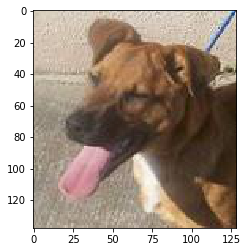

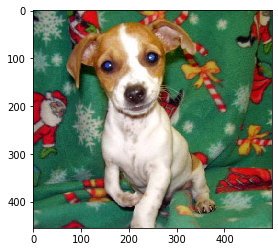

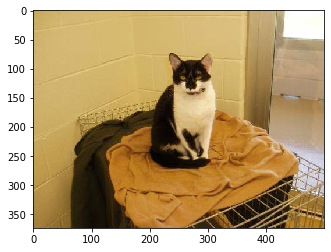

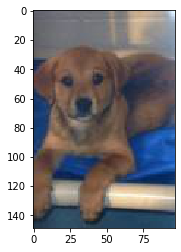

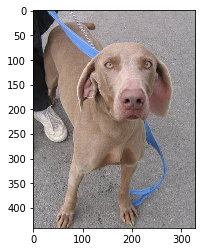

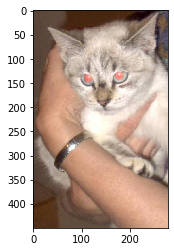

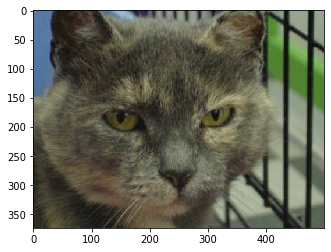

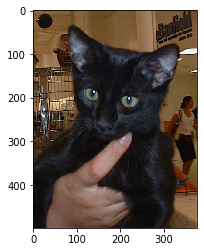

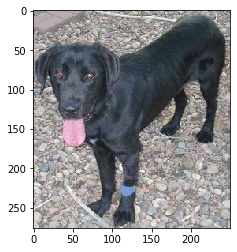

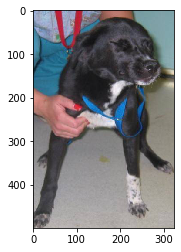

In [5]:
import matplotlib.image as mpimg
for ima in train_imgs[10:20]:
    img=mpimg.imread(ima)
    imgplot=plt.imshow(img)
    plt.show()

In [6]:
nrows = 150
ncolumns = 150
channels = 3 #change to 1 if you wanna use grayscale images

In [7]:
#Next make a function to read and process images properly
def read_and_process_image(list_of_images):
    #We need to convert x into arrays, which must be rezied to our prescribed size
    #gives out y as labels for the images
    X=[] #images
    y=[]#labels
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC)) #all this is done just to read the image
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    return X,y
        

In [8]:
X, y = read_and_process_image(train_imgs)

In [9]:
X[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [169, 170, 168],
        [169, 170, 168],
        [182, 183, 181]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [176, 177, 175],
        [171, 172, 170],
        [187, 188, 186]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [177, 178, 176],
        [176, 177, 175],
        [192, 193, 191]],

       ...,

       [[ 36,  67,  96],
        [ 24,  48,  71],
        [ 40,  56,  73],
        ...,
        [102, 143, 246],
        [ 76, 118, 217],
        [ 80, 130, 220]],

       [[ 73, 114, 156],
        [ 59,  94, 131],
        [ 50,  76, 108],
        ...,
        [ 90, 130, 234],
        [ 79, 121, 220],
        [ 94, 143, 231]],

       [[ 86, 135, 191],
        [ 89, 133, 183],
        [ 75, 112, 156],
        ...,
        [ 41,  82, 186],
        [ 67, 109, 208],
        [ 84, 134, 225]]

In [33]:
#X is successfully converted into a three dimensional array so that we can input for training

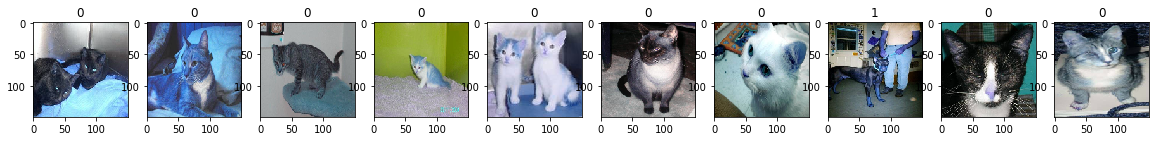

In [36]:
plt.figure(figsize=(20,10))
columns = 10
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title(y[i])
    plt.imshow(X[i])

Text(0.5, 1.0, 'Number of Cats vs Number of Dogs')

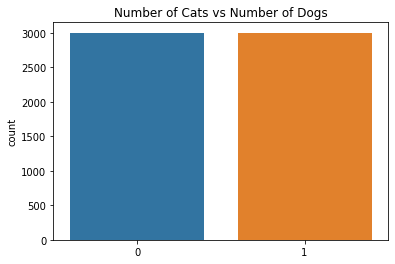

In [37]:
import seaborn as sns


X=np.array(X)
y=np.array(y)

sns.countplot(y)
plt.title('Number of Cats vs Number of Dogs')

In [13]:
print("Shape of train images is: ", X.shape)
print("Shape of labels is: ", y.shape)

Shape of train images is:  (6000, 150, 150, 3)
Shape of labels is:  (6000,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is: ", X.shape)
print("Shape of validation images is: ", X_val.shape)
print("Shape of labels is: ", y.shape)
print("Shape of labels is: ", y_val.shape)

Shape of train images is:  (6000, 150, 150, 3)
Shape of validation images is:  (1200, 150, 150, 3)
Shape of labels is:  (6000,)
Shape of labels is:  (1200,)


In [18]:
ntrain=len(X_train)
nval=len(X_val)
batch_size=32

In [19]:
import keras 
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [22]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [23]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
#Create two generators
train_generator=train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator=val_datagen.flow(X_val, y_val, batch_size=batch_size)
#Training part
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain//batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval//batch_size)

#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

Epoch 1/64
150/150 [==============================] - 174s 1s/step - loss: 0.6939 - acc: 0.5315 - val_loss: 0.7023 - val_acc: 0.5861
Epoch 2/64
150/150 [==============================] - 156s 1s/step - loss: 0.6617 - acc: 0.5954 - val_loss: 0.6890 - val_acc: 0.6550
Epoch 3/64
150/150 [==============================] - 166s 1s/step - loss: 0.6398 - acc: 0.6215 - val_loss: 0.5977 - val_acc: 0.6772
Epoch 4/64
150/150 [==============================] - 158s 1s/step - loss: 0.6180 - acc: 0.6548 - val_loss: 0.5989 - val_acc: 0.7166
Epoch 5/64
150/150 [==============================] - 157s 1s/step - loss: 0.6150 - acc: 0.6546 - val_loss: 0.5409 - val_acc: 0.7320
Epoch 6/64
150/150 [==============================] - 156s 1s/step - loss: 0.5978 - acc: 0.6783 - val_loss: 0.5011 - val_acc: 0.6935
Epoch 7/64
150/150 [==============================] - 158s 1s/step - loss: 0.5891 - acc: 0.6869 - val_loss: 0.4845 - val_acc: 0.7209
Epoch 8/64
150/150 [==============================] - 165s 1s/step - 

<Figure size 432x288 with 0 Axes>

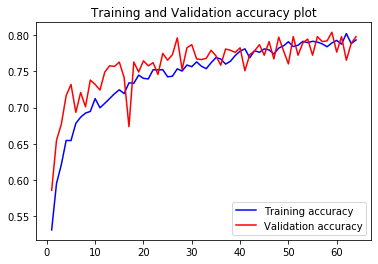

<Figure size 432x288 with 0 Axes>

In [25]:
#Lets plot train and validation curves
#as we saved the entire data in the history variable, lets get data from there
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

#set the epochs to number of values in the 'acc' list
epochs = range(1, len(acc)+1)

#Lets plot Train accuracy against validation accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy plot')
plt.legend()

plt.figure()

<Figure size 432x288 with 0 Axes>

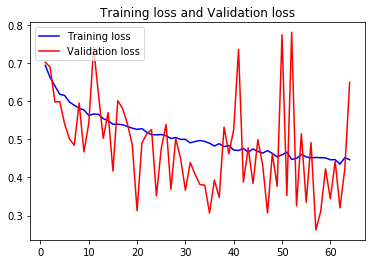

<Figure size 432x288 with 0 Axes>

In [26]:
#Now lets plot the graphs for losses
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training loss and Validation loss")
plt.legend()
plt.figure()

In [27]:
#What do we see from the plots?
#From the first plot we see that as the epochs(i.e., number of cycles we traverse the whole dataset), the accuracy of the model also keeps increasing. 
#It is a good sign
#In the second graphs, overall loss decreases with the number of epochs. It's not the best but it still follows the trend

In [64]:
#Now lets simple test the model with test images
images_dir = '/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin/dogs'
test_imgs1=['/Users/nareshkumar/Desktop/Naresh/FaceRecognition_Linkedin/dogs/{}'.format(i) for i in os.listdir(images_dir)]
X_test, y_test = read_and_process_image(test_imgs1[0:200]) #we need not specify y_test, which is empty as of now
x=np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

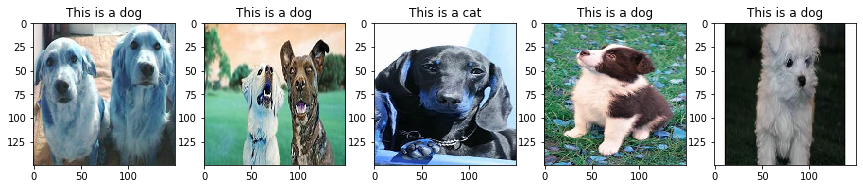

In [67]:
#Now lets create a simple for loop to run the images and print the outputs
i=0
text_labels=[]
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred=model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5/columns +1, columns, i+1)
    plt.title('This is a '+text_labels[i])
    imgplot=plt.imshow(batch[0])
    i+=1
    if i%5==0:
        break
plt.show()

In [68]:
#Done :)